Системы Компьютерной математики Мурадов Майк 3822Б1ПР2
17 Задание
Метод Штрассена

Метод Штрассена заключается в разбиении матрицы на 4 равные клетки


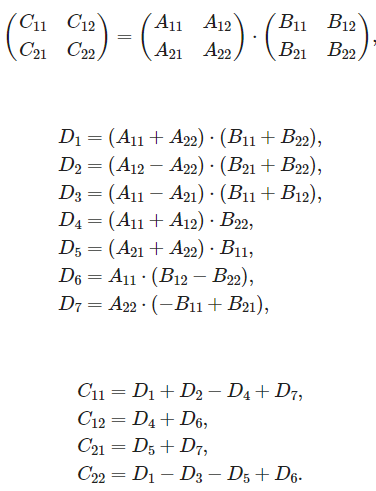

Подключим необходимые библиотеки:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import math

Для начала напишем функцию, выполняющую обычный алгоритм перемножения матриц:

In [15]:
def UsualAlg(A,B):
    n=len(A)
    C = np.zeros((n*n), dtype=np.int).reshape(n,n)
    if(n==1):
        return A[0][0]*B[0][0]
    else:
        for i in range(n):
            for k in range(n):
                for j in range(n):
                    C[i][j] += A[i][k] * B[k][j]
        return C

Напишем функцию,выполняющую алгоритм Штрассена:

In [16]:
def strassen(A,B):
    n = len(A)
    if n == 1:
        return A[0][0] * B[0][0]
    else:
        C = np.zeros((n*n), dtype=np.int).reshape(n,n)
        k = n//2
        
        a11,a21,a12,a22 = A[:k,:k], A[k:, :k], A[:k, k:], A[k:, k:]
        b11,b21,b12,b22 = B[:k,:k], B[k:, :k], B[:k, k:], B[k:, k:]


        d1 = strassen(a11+a22,b11+b22)
        d2 = strassen(a12-a22,b21+b22)
        d3 = strassen(a11-a21,b11+b12)
        d4 = strassen(a11+a12,b22)
        d5 = strassen(a21+a22,b11)
        d6 = strassen(a11,b12-b22)
        d7 = strassen(a22,b21-b11)

        C[:k,:k] = d1+d2-d4+d7
        C[:k, k:] = d4+d6
        C[k:, :k] = d5+d7
        C[k:, k:] = d1-d3-d5+d6

    return C

Теперь можно приступить к исследованию.Напишем код,реализующий тестирование функций:

In [17]:
j=9
kol=np.zeros(j)
times=np.zeros((j),dtype=np.float)
times1=np.zeros((j),dtype=np.float)
for k in range (j):
    n=2**k
    kol[k]=n
    A = np.random.uniform(0,1, size=(n,n))
    B = np.random.uniform(0,1, size=(n,n))
    start=time.monotonic()
    C=strassen(A,B)
    t=time.monotonic()-start
    times[k]=t
    start=time.monotonic()
    C=UsualAlg(A,B)
    t=time.monotonic()-start
    times1[k]=t

<class 'AttributeError'>: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

Теперь на графике проиллюстрируем,как быстро растет время выполнения обоих алгоритмов:

In [18]:
#алгоритм Штрассена
f = np.polyfit(kol, times, 3)
xx = np.linspace(0, 2**(kol.shape[0]-1), 500)
yy = np.polyval(f, xx)
plt.plot(xx, yy, color = 'tab:blue',label='Strassens algorithm')
plt.plot(kol, times, 'o', color = 'tab:orange')

#обычный алгоритм перемножения матриц
f1=np.polyfit(kol, times1, 3)
xx1 = np.linspace(0, 2**(kol.shape[0]-1), 500)
yy1 = np.polyval(f1, xx1)
plt.plot(xx1, yy1, color = 'tab:red',label='Usual algorithm')
plt.plot(kol, times1, 'o', color = 'tab:green')

plt.title('График роста времени работы алгоритмов')
plt.xlabel('Порядок матрицы')
plt.ylabel('Время работы алгоритмов')
plt.legend()
plt.grid()

<class 'NameError'>: name 'times' is not defined

Видно,что в матрицах, порядок которых 2^5 и более, алгоритм Штрассена работает быстрее, причем, чем больше порядок матриц, тем больше разница во времени работы алгоритмов. Продолжим исследование и попробуем доказать асимптотику данных алгоритмов - n^log2(7) для алгоритма Штрассена и для обычного алгоритма перемножения матрицы.Для этого построим графики f(n)/(n^3) и f1(n)/(n^(log2(7)))

In [19]:
#алгоритм Штрассена
d1=[]
for i in range (0,len(times)):
    d10 = times[i]/(kol[i]**(math.log2(7)))
    d1.append(d10)
plt.plot(kol, d1 , '.', label ='Strassens algorithm',color = 'tab:red')


#обычный алгоритм перемножения матриц
d=[]
for i in range (0,len(times1)):
    d0 = times1[i]/(kol[i]**3)
    d.append(d0)
plt.plot(kol, d , '.', label ='Usual algorithm',color = 'tab:green')

plt.legend(loc = 'best', framealpha = 1)
plt.xlabel("Порядок матрицы")
plt.ylabel("Время работы функции")
plt.title("Зависимость")
pass

plt.grid()

<class 'NameError'>: name 'times' is not defined

Можно заметить,что из-за нехватки вычислительной мощности и погрешности измерений, результаты получается не совсем точные и часть графика является константым 0.Но даже по таким данным можно сделать вывод,что время работы обычного алгоритма умножения матрицы растет кубически, а алгоритма Штрассена согласно графику n^log2(7).

Вывод:
Я провел исследовательскую работу и выяснил,что алгоритм Штрассена работает быстрее стандартного алгоритма перемножения матриц для матриц порядка 2^n,начиная с размерности 2^5 * 2^5. Кроме того,я сравнил график с реальной асипмтотикой и выяснил,что время выполнения обычного алгоритма умножения матриц растет кубически,а алгоритма Штрассена по графику n^log2(7).